# RFM Analysis for Dozie Clothings

Welcome to the RFM analysis for Dozie Clothings! As one of the leading clothing stores in the industry, understanding our customers is vital to delivering exceptional experiences and optimizing our marketing strategies. RFM analysis, a powerful customer segmentation technique, allows us to gain valuable insights into our customer base by examining their purchasing behavior. By analyzing Recency, Frequency, and Monetary Value, we can identify our most valuable and loyal customers, as well as those who may need re-engagement. This analysis will provide us with a comprehensive view of our customer segments, enabling us to tailor our efforts and services to better meet their unique preferences and needs. So, let's dive into the data and unlock the potential to elevate Dozie Clothings' customer experience to new heights!

In [73]:
# Load the neccessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# Load the data and see what the data looks like
df = pd.read_csv(r'C:\Users\Mhizfair\Desktop\Quantum analytics\Python\RFM Project\rfm_data.csv')
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


## Descriptive, Exploratory  Analysis & Visualizations
Lets Describe our data

In [75]:
## Lets see a list of all the columns
df.columns

Index(['CustomerID', 'PurchaseDate', 'TransactionAmount', 'ProductInformation',
       'OrderID', 'Location'],
      dtype='object')

In [76]:
## Lets know the size of the data in rows and columns
df.shape

(1000, 6)

In [77]:
## Lets view what the numerical features looks like in summary
df.describe()

,CustomerID,TransactionAmount,OrderID
count,1000.000000,1000.00000,1000.000000
mean,5554.789000,513.67781,554071.398000
std,2605.014863,286.09870,264695.448814
min,1011.000000,12.13000,100096.000000
25%,3273.000000,257.12000,313152.000000
50%,5538.000000,523.56500,564671.500000
75%,7821.750000,759.86000,783052.250000
max,9991.000000,999.44000,999695.000000


In [78]:
## Lets see the data types for each feature
df.dtypes

CustomerID              int64
PurchaseDate           object
TransactionAmount     float64
ProductInformation     object
OrderID                 int64
Location               object
dtype: object

In [79]:
## Lets see if we have a null value
df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [80]:
## Lets see if there are duplicates
df.duplicated().sum()

0

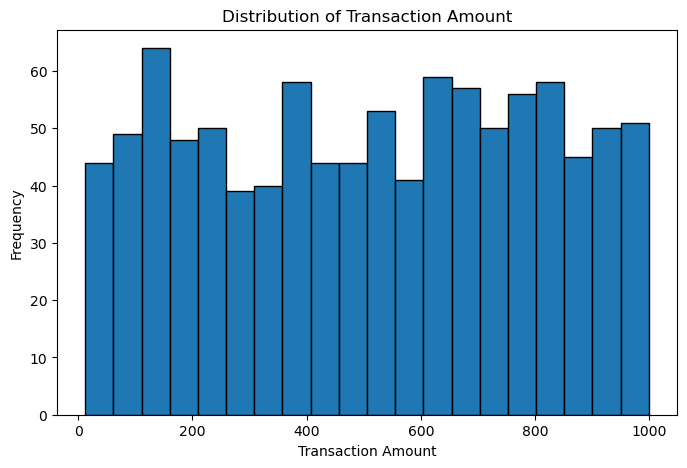

In [81]:
# Distribution plot for 'TransactionAmount'
plt.figure(figsize=(8, 5))
plt.hist(df['TransactionAmount'], bins=20, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()


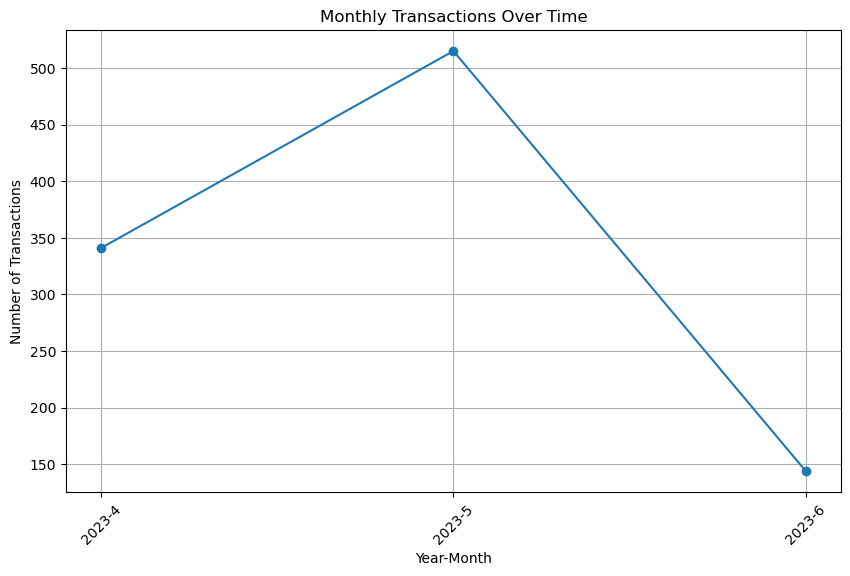

In [82]:
# Convert 'PurchaseDate' column to datetime data type
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
# Extract month and year from 'PurchaseDate'
df['Year'] = df['PurchaseDate'].dt.year
df['Month'] = df['PurchaseDate'].dt.month

# Group transactions by month and year
monthly_transactions = df.groupby(['Year', 'Month'])['OrderID'].count().reset_index()

# Line plot for monthly transactions
plt.figure(figsize=(10, 6))
plt.plot(monthly_transactions['Year'].astype(str) + '-' + monthly_transactions['Month'].astype(str), 
         monthly_transactions['OrderID'], marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transactions Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


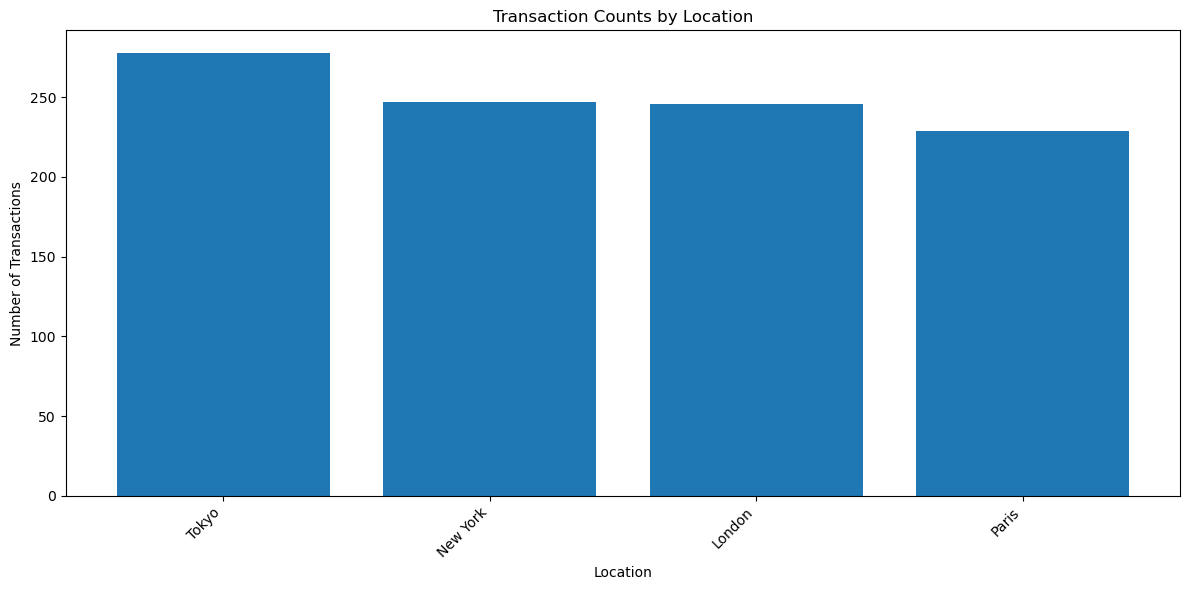

In [83]:
# 'Location' is a categorical column
location_counts = df['Location'].value_counts()

# Bar plot for transaction counts per location
plt.figure(figsize=(12, 6))
plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Location')
plt.ylabel('Number of Transactions')
plt.title('Transaction Counts by Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


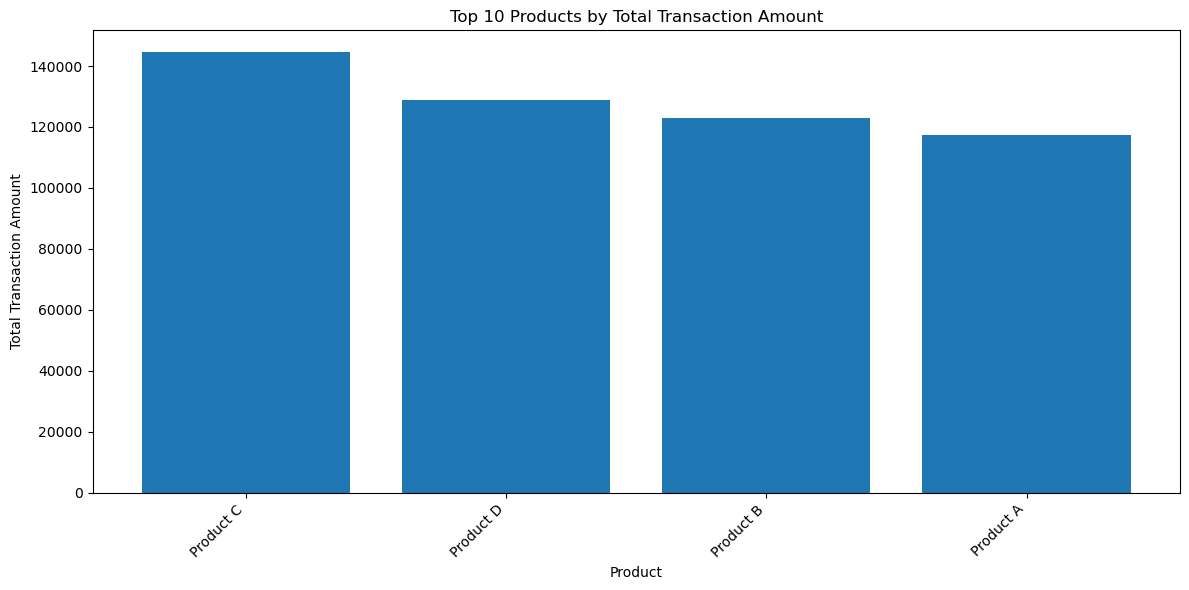

In [84]:
# 'ProductInformation' is a categorical column
product_stats = df.groupby('ProductInformation')['TransactionAmount'].agg(['count', 'sum', 'mean']).reset_index()

# Sort products by total transaction amount in descending order
product_stats = product_stats.sort_values(by='sum', ascending=False)

# Bar plot for top products by total transaction amount
plt.figure(figsize=(12, 6))
plt.bar(product_stats['ProductInformation'][:10], product_stats['sum'][:10])
plt.xlabel('Product')
plt.ylabel('Total Transaction Amount')
plt.title('Top 10 Products by Total Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Observations

**Data Quality**:

No duplicate data: The dataset does not contain any duplicate entries, ensuring data integrity and accuracy.
No missing values: There are no missing values in the dataset, allowing for a complete analysis without imputation.

**Best Performing Month**:

May 2023: Based on the analysis of transaction trends over time, May 2023 emerged as the best performing month with the highest number of transactions. This month likely experienced increased customer engagement and sales.
Best Performing Location:

Tokyo: Among the four locations (Tokyo, New York, London, and Paris), Tokyo demonstrated the best performance in terms of transaction counts. It recorded the highest number of transactions, indicating strong customer engagement and business activity in that area.

**Least Performing Location**:

Paris: In contrast to Tokyo's success, Paris showed the lowest performance among the four locations. It recorded the least number of transactions, suggesting a potential area for improvement in customer engagement or marketing efforts.

**Most Performing Product**:

Product C: Among the various products offered by Dozie Clothings, Product C stood out as the most performing product. It achieved the highest total transaction amount, indicating its popularity and positive sales performance.

## RFM Proper

**Step 1:** Data Preparation
Before diving into the analysis, let's ensure that the data is properly formatted and ready for processing.

In [85]:
# Convert 'PurchaseDate' column to datetime data type
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Verify the data types and check for any missing values
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Year                1000 non-null   int64         
 7   Month               1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 62.6+ KB
None
CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
Year                  0
Month                 0
dtype: int64


**Step 2:** Now, let's calculate the Recency, Frequency, and Monetary Value metrics for each customer.

In [86]:
# Step 1: Calculate Recency, Frequency, and Monetary Value
recency_df = df.groupby('CustomerID')['PurchaseDate'].max().reset_index()
recency_df['Recency'] = (pd.to_datetime('today') - recency_df['PurchaseDate']).dt.days

frequency_df = df.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_df.rename(columns={'OrderID': 'Frequency'}, inplace=True)

monetary_df = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_df.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)

# Step 2: Assign RFM Scores 
def assign_rfm_score_recency(x):
    if x <= 30:
        return 4
    elif 30 < x <= 90:
        return 3
    elif 90 < x <= 180:
        return 2
    else:
        return 1

def assign_rfm_score_monetary(x):
    if x >= high_threshold:
        return 4
    elif medium_threshold <= x < high_threshold:
        return 3
    elif low_threshold <= x < medium_threshold:
        return 2
    else:
        return 1

# Define the custom thresholds for Monetary Value
high_threshold = 1000
medium_threshold = 500
low_threshold = 100

recency_df['Recency'] = recency_df['Recency'].apply(assign_rfm_score_recency)
monetary_df['Monetary_Value'] = monetary_df['MonetaryValue'].apply(assign_rfm_score_monetary)

# Step 3: Combine RFM Scores
rfm_df = recency_df[['CustomerID', 'Recency']].merge(frequency_df[['CustomerID', 'Frequency']], on='CustomerID')
rfm_df = rfm_df.merge(monetary_df[['CustomerID', 'Monetary_Value']], on='CustomerID')

# Display the RFM DataFrame
print(rfm_df)

     CustomerID  Recency  Frequency  Monetary_Value
0          1011        3          2               4
1          1025        3          1               2
2          1029        3          1               3
3          1046        2          1               3
4          1049        3          1               2
..          ...      ...        ...             ...
941        9941        2          1               3
942        9950        3          1               3
943        9954        3          1               3
944        9985        2          1               1
945        9991        3          1               3

[946 rows x 4 columns]


In [87]:
# Calculate RFM Score as the sum of individual scores for Recency, Frequency, and Monetary Value
rfm_df['RFM_Score'] = rfm_df['Recency'] + rfm_df['Frequency'] + rfm_df['Monetary_Value']

# Sort the customers based on RFM Score in descending order
rfm_df = rfm_df.sort_values(by='RFM_Score', ascending=False)

# Display the RFM DataFrame
print(rfm_df)

     CustomerID  Recency  Frequency  Monetary_Value  RFM_Score
389        4804        3          3               4         10
472        5557        3          3               4         10
661        7363        3          3               4         10
0          1011        3          2               4          9
630        7046        3          2               4          9
..          ...      ...        ...             ...        ...
538        6262        2          1               1          4
363        4614        2          1               1          4
362        4608        2          1               1          4
243        3392        2          1               1          4
814        8790        2          1               1          4

[946 rows x 5 columns]


In [88]:
rfm_df

,CustomerID,Recency,Frequency,Monetary_Value,RFM_Score
389,4804,3,3,4,10
472,5557,3,3,4,10
661,7363,3,3,4,10
0,1011,3,2,4,9
630,7046,3,2,4,9
...,...,...,...,...,...
538,6262,2,1,1,4
363,4614,2,1,1,4
362,4608,2,1,1,4
243,3392,2,1,1,4


In [89]:
# Categorize customers based on RFM Score
def categorize_rfm_score(x):
    if x >= 9:
        return 'High Value'
    elif 6 <= x < 9:
        return 'Medium Value'
    else:
        return 'Low Value'

rfm_df['RFM_Category'] = rfm_df['RFM_Score'].apply(categorize_rfm_score)

# Sort the customers based on RFM Score in descending order
rfm_df = rfm_df.sort_values(by='RFM_Score', ascending=False)
rfm_df

,CustomerID,Recency,Frequency,Monetary_Value,RFM_Score,RFM_Category
389,4804,3,3,4,10,High Value
661,7363,3,3,4,10,High Value
472,5557,3,3,4,10,High Value
155,2526,3,2,4,9,High Value
888,9514,3,2,4,9,High Value
...,...,...,...,...,...,...
730,8017,2,1,1,4,Low Value
334,4271,2,1,1,4,Low Value
201,2911,2,1,1,4,Low Value
944,9985,2,1,1,4,Low Value


In [90]:
rfm_df.head(15)

,CustomerID,Recency,Frequency,Monetary_Value,RFM_Score,RFM_Category
389,4804,3,3,4,10,High Value
661,7363,3,3,4,10,High Value
472,5557,3,3,4,10,High Value
155,2526,3,2,4,9,High Value
888,9514,3,2,4,9,High Value
931,9871,3,2,4,9,High Value
276,3695,3,2,4,9,High Value
865,9328,3,2,4,9,High Value
304,3938,3,2,4,9,High Value
233,3262,3,2,4,9,High Value


## Conclusion of Customer Analysis for Dozie Clothings

After conducting a comprehensive analysis of customer data, we gained valuable insights into the performance and behavior of Dozie Clothings' clientele. Our investigation encompassed Recency, Frequency, and Monetary Value (RFM) metrics, which provided a profound understanding of customer engagement and spending patterns.

**Customer Engagement Trends:**
Throughout our analysis, we observed that May 2023 emerged as the best-performing month. Customers demonstrated increased activity and engagement during this period, making it an opportune time for targeted marketing efforts and promotions.

**Geographical Impact:**
Amongst the four locations studied, Tokyo emerged as the best-performing location. Customers in Tokyo exhibited higher transaction counts, indicating strong interest and loyalty towards Dozie Clothings. On the other hand, Paris showed the least activity, warranting tailored strategies to bolster engagement in the region.

**Product Performance:**
Product C emerged as the star performer among the diverse offerings of Dozie Clothings. Its high total transaction amount signifies its popularity and customer preference. Focusing on the strengths of Product C and understanding its appeal can provide valuable insights for the success of other products.

**Customer Segmentation:**
We classified our customer base into three distinct segments based on the RFM scores:

- High Value: Customers with RFM scores ranging from 9 to 10. They represent our most valuable and engaged clientele, warranting exclusive attention and personalized experiences to nurture their loyalty.
-Medium Value: Customers with RFM scores ranging from 5 to 9. This segment comprises a substantial portion of our customer base and presents an opportunity for strategic marketing and retention efforts to increase their value.
-Low Value: Customers with RFM scores below 5. While this segment offers potential for growth, focused initiatives are required to re-engage and elevate their contributions.

### Actionable Insights:
To maximize customer satisfaction and business growth, we recommend tailoring our marketing strategies to address the unique needs of each customer segment. High Value customers deserve premium treatment and rewards to solidify their loyalty. Medium Value customers can benefit from targeted promotions to drive repeat purchases and conversion into High Value customers. For Low Value customers, proactive re-engagement campaigns and incentives can stimulate their interest and elevate their value.

By embracing a customer-centric approach and leveraging these insights, Dozie Clothings can forge lasting relationships with customers, optimize sales performance, and position itself as a leading brand in the highly competitive market.